In [1]:
import pandas as pd
import numpy as np
import glob
import gensim
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
import tqdm
import nltk
import re
from operator import itemgetter
import time
import advertools as adv
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\manme\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
def remove_tags(tweet):
    return re.sub('#jnj|#dyk|#unsubscribe','',tweet)

In [4]:
def hashtags(data,column):
    hashtag_summary = adv.extract_hashtags(data[column].astype('str').values.tolist())    
    plt.figure(figsize=(14, 6))
    plt.barh([x[0] for x in hashtag_summary['top_hashtags'][:10]][::-1],
         [x[1] for x in hashtag_summary['top_hashtags'][:10]][::-1])
    plt.title('Top Hashtags for {}'.format(data.name))
    plt.show()
    
    return print("hashtag_overview:",hashtag_summary['overview'])

In [5]:
 def mentions(data,column):
    mention_summary = adv.extract_mentions(data[column].astype('str').values.tolist())
    plt.figure(figsize=(15,6))
    plt.barh([x[0] for x in mention_summary['top_mentions'][:10]][::-1],
         [x[1] for x in mention_summary['top_mentions'][:10]][::-1])
    plt.title('Top Mentions for {}'.format(data.name))
    plt.show()
    return print("overview:",mention_summary['overview'])

In [6]:
# Constants
PHARMA_PATH = '../../../data/twitter/combined data/pharma companies'
GOVT_INSTITUTES_PATH = '../../../data/twitter/combined data/public health agencies'
NGO_PATH = '../../../data/twitter/combined data/ngo'

In [7]:
pharma_df = pd.concat([pd.read_csv(f, sep=',') for f in glob.glob(PHARMA_PATH + "/*.csv")],ignore_index=True)
pharma_df.name = 'Pharma Companies'
govt_institutes_df = pd.concat([pd.read_csv(f, sep=',') for f in glob.glob(GOVT_INSTITUTES_PATH + "/*.csv")],ignore_index=True)
govt_institutes_df.name = 'Public Health Agencies'
ngo_df = pd.concat([pd.read_csv(f, sep=',') for f in glob.glob(NGO_PATH + "/*.csv")],ignore_index=True)
ngo_df.name = 'WHO'

### Pharma Companies

In [8]:
# Convert 'created_at' column to datetime
pharma_df['created_at'] = pharma_df['created_at'].str[:-6]
pharma_df['created_at'] = pd.to_datetime(pharma_df['created_at'])

# Sort by datetime ascending
pharma_df = pharma_df.sort_values(by='created_at')

pharma_df['tweet'] = pharma_df['tweet'].str.replace('#jnj|#dyk|#unsubscribe','',regex=True,case=False)

In [12]:
# Divide as per dates
pre_covid_pharma = pharma_df.loc[pharma_df['created_at'] <= '2020-02-26 23:59:59']
pre_covid_pharma.name = 'Pharmaceutical Companies'
print(pre_covid_pharma.shape)

during_covid_pharma = pharma_df.loc[pharma_df['created_at'] >= '2020-02-27 00:00:00']
print(during_covid_pharma.shape)
during_covid_pharma.name = 'Pharmaceutical Companies'

(17939, 17)
(7897, 17)


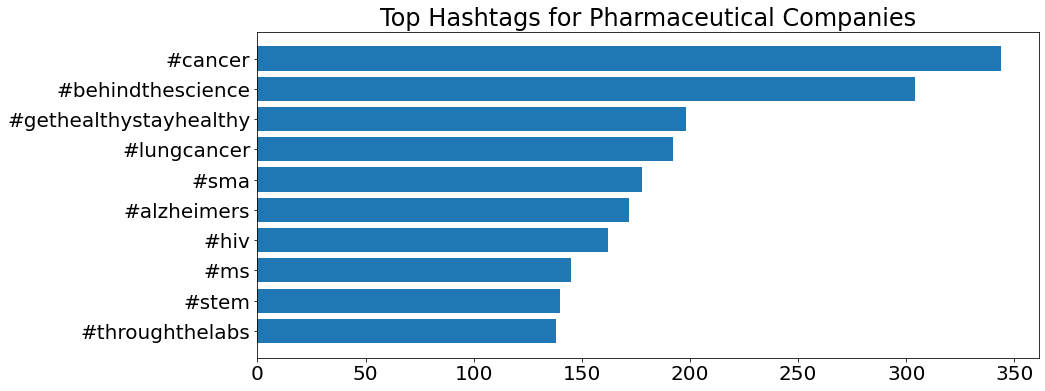

hashtag_overview: {'num_posts': 17939, 'num_hashtags': 21550, 'hashtags_per_post': 1.2012932716427895, 'unique_hashtags': 3602}


In [13]:
hashtags(pre_covid_pharma, 'tweet')

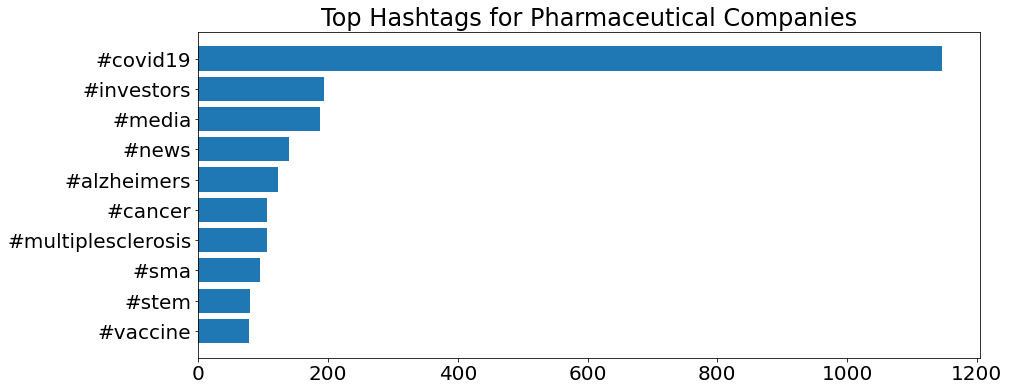

hashtag_overview: {'num_posts': 7897, 'num_hashtags': 9861, 'hashtags_per_post': 1.248702038748892, 'unique_hashtags': 1819}


In [11]:
# during_covid_pharma['tweet'] = during_covid_pharma['tweet'].apply(remove_tags)
hashtags(during_covid_pharma, 'tweet')

In [ ]:
mentions(pre_covid_pharma, 'tweet')

In [ ]:
mentions(during_covid_pharma, 'tweet')

### Public Health Agencies

In [14]:
# Convert 'created_at' column to datetime
govt_institutes_df['created_at'] = govt_institutes_df['created_at'].str[:-6]
govt_institutes_df['created_at'] = pd.to_datetime(govt_institutes_df['created_at'])

# Sort by datetime ascending
govt_institutes_df = govt_institutes_df.sort_values(by='created_at')
govt_institutes_df['tweet'] = govt_institutes_df['tweet'].str.replace('#jnj|#dyk|#unsubscribe|#stop','',regex=True,case=False)

# Divide as per dates
pre_covid_pha = govt_institutes_df.loc[govt_institutes_df['created_at'] <= '2020-02-26 23:59:59']
pre_covid_pha.name = 'Public Health Agencies'
print(pre_covid_pha.shape)

during_covid_pha = govt_institutes_df.loc[govt_institutes_df['created_at'] >= '2020-02-27 00:00:00']
during_covid_pha.name = 'Public Health Agencies'
print(during_covid_pha.shape)

(47263, 18)
(64293, 18)


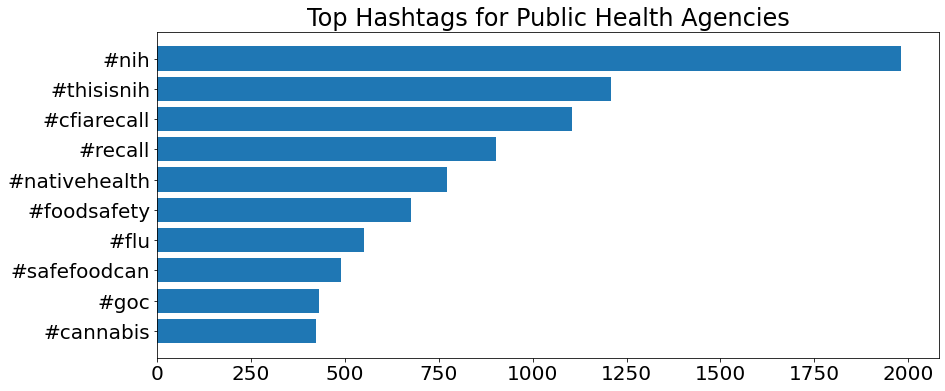

hashtag_overview: {'num_posts': 47263, 'num_hashtags': 57701, 'hashtags_per_post': 1.2208492901423946, 'unique_hashtags': 7620}


In [16]:
hashtags(pre_covid_pha, 'tweet')

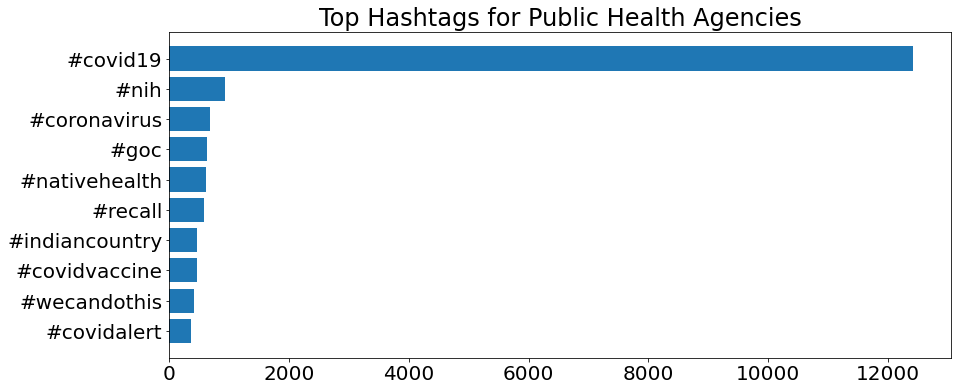

hashtag_overview: {'num_posts': 64293, 'num_hashtags': 41503, 'hashtags_per_post': 0.6455290622618326, 'unique_hashtags': 4483}


In [15]:
hashtags(during_covid_pha, 'tweet')

In [ ]:
mentions(pre_covid_pha, 'tweet')

In [ ]:
mentions(during_covid_pha, 'tweet')

### WHO

In [ ]:
# Convert 'created_at' column to datetime
ngo_df['created_at'] = ngo_df['created_at'].str[:-6]
ngo_df['created_at'] = pd.to_datetime(ngo_df['created_at'])

# Sort by datetime ascending
ngo_df = ngo_df.sort_values(by='created_at')

ngo_df['tweet'] = ngo_df['tweet'].str.replace('#jnj|#dyk|#unsubscribe|#coronavirus','',regex=True,case=False)

# Divide as per dates
pre_covid_who = ngo_df.loc[ngo_df['created_at'] <= '2020-02-26 23:59:59']
pre_covid_who.name = 'WHO'
print(pre_covid_who.shape)

during_covid_who = ngo_df.loc[ngo_df['created_at'] >= '2020-02-27 00:00:00']
during_covid_who.name = 'WHO'
print(during_covid_who.shape)

In [ ]:
hashtags(pre_covid_who, 'tweet')

In [ ]:
hashtags(during_covid_who, 'tweet')

In [ ]:
mentions(pre_covid_who, 'tweet')

In [ ]:
mentions(during_covid_who, 'tweet')